<a href="https://colab.research.google.com/github/SachinMhetre678/Machine_Learning/blob/main/SVM/PBL1(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/merged.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       573 non-null    int64  
 1   sex       573 non-null    int64  
 2   cp        573 non-null    int64  
 3   trestbps  573 non-null    int64  
 4   chol      573 non-null    int64  
 5   fbs       573 non-null    int64  
 6   restecg   573 non-null    int64  
 7   thalach   573 non-null    int64  
 8   exang     573 non-null    int64  
 9   oldpeak   573 non-null    float64
 10  slope     573 non-null    int64  
 11  ca        573 non-null    int64  
 12  thal      573 non-null    int64  
 13  target    573 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 62.8 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


<ipython-input-6-6f657ee62baf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.target==0].thalach,label='Normal person')
<ipython-input-6-6f657ee62baf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.target==1].thalach,label='Person with heart disease')


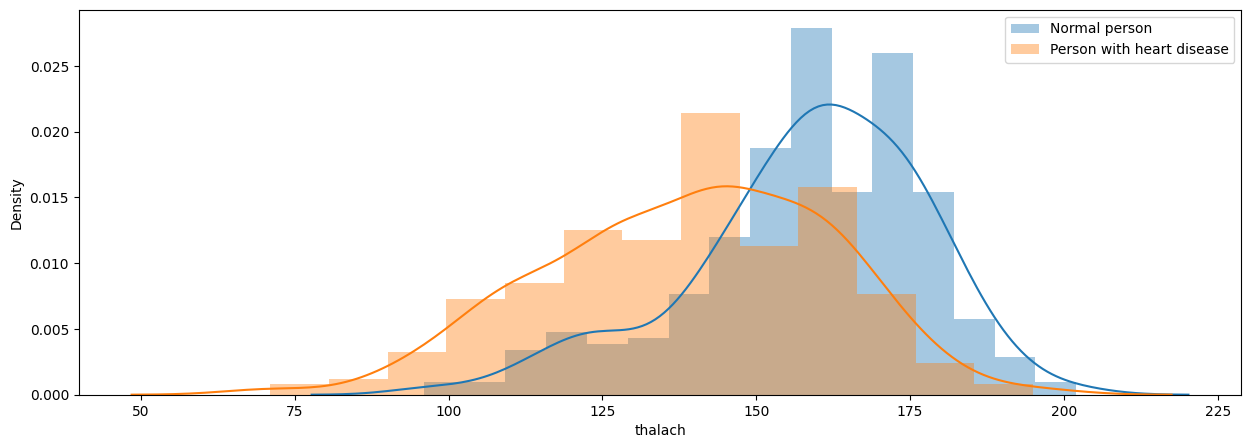

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df.target==0].thalach,label='Normal person')
sns.distplot(df[df.target==1].thalach,label='Person with heart disease')
plt.legend()
plt.show()

In [5]:
df['target'].value_counts()

0    314
1    259
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

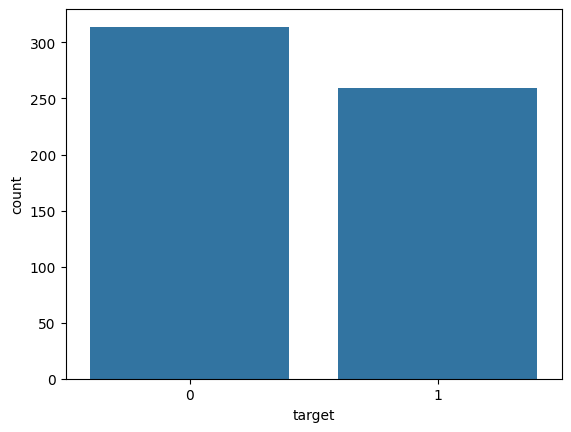

In [6]:
sns.countplot(x='target',data=df)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,54.436300,0.678883,2.165794,131.527051,248.090750,0.148342,1.005236,149.640489,0.328098,1.044503,0.593368,0.666667,1.827225,0.452007
std,9.063965,0.467314,0.954607,17.708934,51.710215,0.355749,0.995606,22.992319,0.469931,1.152631,0.614872,0.938058,0.957027,0.498126
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [7]:
x = df.drop('target',axis=1)
y = df['target']

#another way to do these is
# df['target'] = pd.get_dummies(df['target'],drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state = 101)

In [11]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC(class_weight=0.01)

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 2, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

# Create GridSearchCV object
gs_clf = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=3)

# Fit the model for grid search
gs_clf.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", gs_clf.best_params_)

# Check if the accuracy score is greater than or equal to 0.9
accuracy_score = gs_clf.score(x_test, y_test)
if accuracy_score >= 0.9:
    print(f"Accuracy score: {accuracy_score*100:.2f}%")


In [ ]:
# grid = GridSearchCV(svc,param_grid)

In [ ]:
# grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'coef0': [0.001, 0.0001], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto']})

In [ ]:
# grid.best_params_

{'C': 1, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
# grid_preds = grid.predict(scaled_x_test)

In [ ]:
confusion_matrix(y_test,grid_preds)

array([[148,  14],
       [ 22, 103]])

In [ ]:
accuracy_score(y_test,grid_preds)

0.8745644599303136

In [ ]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       162
           1       0.88      0.82      0.85       125

    accuracy                           0.87       287
   macro avg       0.88      0.87      0.87       287
weighted avg       0.87      0.87      0.87       287



In [ ]:
input_data = (67,1,3,160,286,0,2,108,1,1.5,1,3,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = grid.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
